# Testing Prompts and API

### JSON output

Outputting data in Json format

In [ ]:
from openai import AzureOpenAI

user_message = "Output the meaning of life in a way a computer would understand, format JSON"
try:

    # https://learn.microsoft.com/en-us/azure/ai-services/openai/reference#rest-api-versioning
    client = AzureOpenAI(
        # if no key specified gets the API Key from environment variable AZURE_OPENAI_API_KEY
        api_version="2024-08-01-preview",
        # https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/create-resource?pivots=web-portal#create-a-resource
        azure_endpoint="https://open-ai-service-class.openai.azure.com/",
    )


    completion = client.chat.completions.create(
    model="gpt-4o-mini",  # e.g. gpt-35-instant
    messages=[
        {
            "role": "user",
            "content": user_message,
        },
    ],
    response_format = {"type":"json_object"}
    )
    print(f"Prompt: {user_message}")
    print(completion.choices[0].message.content)
except Exception as e:
    print("Sorry, I encountered an error.")
    print(e)

Prompt: Output the meaning of life in a way a computer would understand, format JSON
{
  "meaning_of_life": {
    "philosophical": {
      "interpretations": [
        {
          "perspective": "Existentialism",
          "description": "Individuals create their own meaning through choices and actions."
        },
        {
          "perspective": "Absurdism",
          "description": "Life has no inherent meaning, and individuals must find purpose despite this."
        },
        {
          "perspective": "Religious",
          "description": "Meaning is derived from a higher power or deity and follows belief systems."
        }
      ]
    },
    "biological": {
      "description": "To survive, reproduce, and pass on genetic material."
    },
    "scientific": {
      "perspective": "Thermodynamics",
      "description": "The universe seeks entropy, and life is a temporary phase in a larger cosmic process."
    },
    "cultural": {
      "description": "Meaning is shaped by soci

In [4]:
import requests
url = 'http://api.cfl.ca/v1/standings'

try:
    response = requests.get(url)
    response.raise_for_status()  # Raise HTTPError for bad responses (4xx and 5xx)
    data = response.json()
    print('CFL League Standings:', data)
except requests.exceptions.RequestException as error:
    print('Error fetching data from CFL API:', error)

Error fetching data from CFL API: HTTPConnectionPool(host='api.cfl.ca', port=80): Max retries exceeded with url: /v1/standings (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x000002499BC9F1D0>: Failed to resolve 'api.cfl.ca' ([Errno 11001] getaddrinfo failed)"))


### Simple test of my chatbot API

Dec 20 2024: Doesn't work currently as I've got session token authentication enabled so I need to send that through.

In [2]:
##Testing out connecting to my webapp
import requests

# Replace with your actual Azure App Service URL
url = "https://daiol-chatbot-c7c6bhf0cghgdtdj.canadacentral-01.azurewebsites.net/api/chat"

# Sample message to send to the chatbot
payload = {
    "message": "Explain to me personality theory in a few words"
}

# Make a POST request to the API
try:
    response = requests.post(url, json=payload)

    # Check if the request was successful
    if response.status_code == 200:
        print("Response from chatbot:", response.json()["response"])
    else:
        print(f"Failed to get a valid response. Status code: {response.status_code}")
        print("Response content:", response.text)
        
except Exception as e:
    print("An error occurred:", e)

Failed to get a valid response. Status code: 401
Response content: {"error":"Invalid session token"}



Cool learning: I need to add history to the chatbot - it asked me a questions about kindergarten cop when I submitted "Who is your daddy and what does he do". I think its neat but makes sense

## Oct 19

Finally got a front end working for my webapp, i can deploy the chatbot on my app service account. now I should be able to embed the htmls.

# Prompt Engineering

**Nov 24:** LOL: 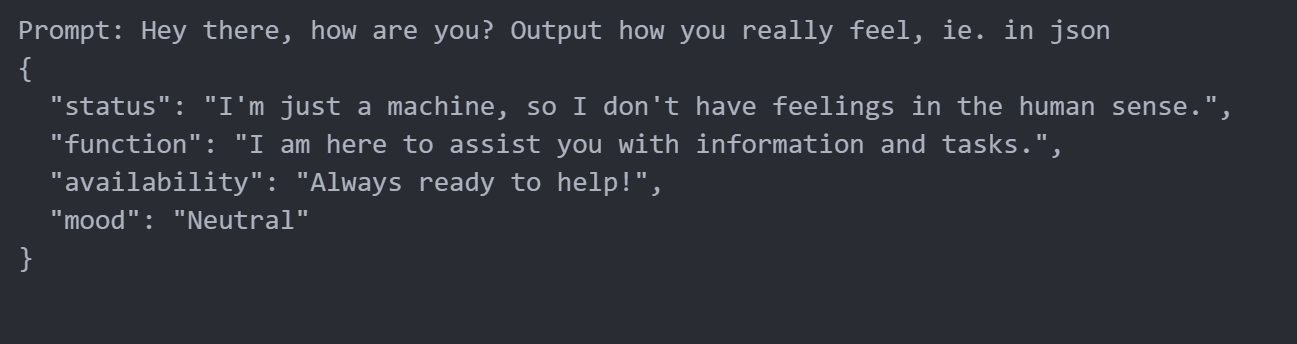